### Horses vs Humans Classification

dataset source: https://laurencemoroney.com/datasets.html

##### Preprocessing images to train a neural network

In [ ]:
#importing libraries
import os
import random
import numpy as np
from io import BytesIO


#plotting and dealing with images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf

#interactive widgets
from ipywidgets import widgets



##### About dataset

base directory horse-or-human, which in turn contains horses and humans subdirectories. By arranging the data this way, you do not need to explicitly label the images as horses or humans. The utility you will use later automatically labels images according to this directory structure.

In [4]:
train_dir = "horse-or-human"

#listing sub-directories under it

print(f"Sub-directories in current directory: {os.listdir(train_dir)}")

Sub-directories in current directory: ['horses', 'humans']


In [6]:
#directory with the training horse images

train_horse_dir = os.path.join(train_dir, "horses")

#directory with the training human images

train_human_dir = os.path.join(train_dir, "humans")

#check the filenames
train_horse_names = os.listdir(train_horse_dir)
print(f"5 files in horses subdirectory: {train_horse_names[:5]}")

train_human_names = os.listdir(train_human_dir)
print(f"5 files in human subdirectory: {train_human_names[:5]}")

5 files in horses subdirectory: ['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png']
5 files in human subdirectory: ['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png']


In [8]:
# Total number of images in each directory
print(f"Total training horse images : {len(train_horse_names)}")
print(f"Total training human images : {len(train_human_names)}")

Total training horse images : 500
Total training human images : 527


##### Visualizing images

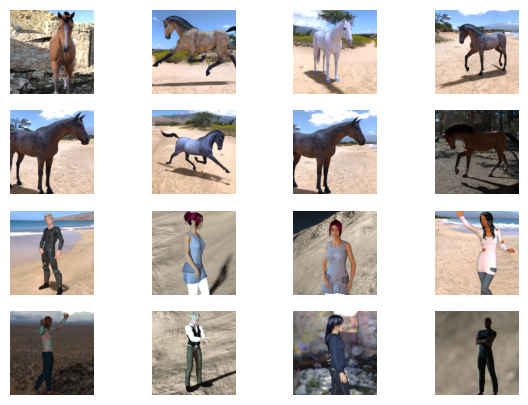

In [36]:
# let's visualize few images in batches

nrows = 4
ncols = 4

plt.subplots(nrows, ncols, figsize=(7, 5))

for i in range(8):
    plt.subplot(nrows, ncols, i+1)
    image_path = os.path.join(train_horse_dir,random.sample(train_horse_names, k=1)[0])
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")

for i in range(8):
    plt.subplot(nrows, ncols, i+9)
    image_path = os.path.join(train_human_dir,random.sample(train_human_names, k=1)[0])
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis("off")  
   

In [37]:
# # Parameters for your graph; you will output images in a 4x4 configuration
# nrows = 4
# ncols = 4

# # Set up matplotlib fig, and size it to fit 4x4 pics
# fig = plt.gcf()
# fig.set_size_inches(ncols * 3, nrows * 3)

# next_horse_pix = [os.path.join(train_horse_dir, fname)
#                 for fname in random.sample(train_horse_names, k=8)]
# next_human_pix = [os.path.join(train_human_dir, fname)
#                 for fname in random.sample(train_human_names, k=8)]

# for i, img_path in enumerate(next_horse_pix + next_human_pix):
#     # Set up subplot; subplot indices start at 1
#     sp = plt.subplot(nrows, ncols, i + 1)
#     sp.axis('Off') # Don't show axes (or gridlines)

#     img = mpimg.imread(img_path)
#     plt.imshow(img)

# plt.show()

##### Building a model

In [38]:
model = tf.keras.models.Sequential([
tf.keras.Input(shape=(300, 300, 3)),
tf.keras.layers.Conv2D(16, (3,3), activation="relu"),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation="relu"),
tf.keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,704,097 (6.50 MB)

 Trainable params: 1,704,097 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
#model compiling

model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy']
              )

#### Data preprocessing

 We will use the image_from_dataset_directory utility to read pictures in the source folders, convert them to tensors, and combine them with their labels to form a tf.data.Dataset. This uses the tf.data API which is optimized for parallel processing such as feeding data to GPUs and TPUs. It makes the training much faster than when using regular Numpy arrays.

In [41]:
#instantiate the dataset

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(300, 300),
    batch_size=32, 
    label_mode="binary"
)

#checking type of dataset created
print(type(train_dataset))

Found 1027 files belonging to 2 classes.
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


* The cell below gets one batch of data using the take() method and extracts the data. This should be a tuple of 2 elements which corresponds to an (image, label) pair.
* The first should have (300,300,3) corresponding to the images and the other should have (1) for the single number labels. Both will have an additional 128 in front for the batch size set earlier.

In [47]:
#sample batch from dataset
sample_batch = list(train_dataset.take(1))[0]


# Check that the output is a pair
print(f'sample batch data type: {type(sample_batch)}')
print(f'number of elements: {len(sample_batch)}')

# Extract image and label
image_batch = sample_batch[0]
label_batch = sample_batch[1]

# Check the shapes
print(f'image batch shape: {image_batch.shape}')
print(f'label batch shape: {label_batch.shape}')

sample batch data type: <class 'tuple'>
number of elements: 2
image batch shape: (32, 300, 300, 3)
label batch shape: (32, 1)


In [48]:
#image_batch preview

print(image_batch[0].numpy())

[[[145. 188. 255.]
  [146. 189. 255.]
  [139. 184. 254.]
  ...
  [251. 255. 255.]
  [249. 255. 255.]
  [244. 255. 255.]]

 [[160. 198. 255.]
  [164. 201. 255.]
  [153. 194. 255.]
  ...
  [236. 250. 255.]
  [228. 243. 255.]
  [218. 235. 255.]]

 [[164. 200. 255.]
  [166. 202. 255.]
  [162. 201. 255.]
  ...
  [212. 230. 255.]
  [197. 218. 255.]
  [186. 209. 255.]]

 ...

 [[ 99.  86.  75.]
  [101.  86.  73.]
  [105.  89.  75.]
  ...
  [214. 189. 167.]
  [212. 187. 165.]
  [211. 186. 165.]]

 [[102.  85.  73.]
  [ 95.  79.  68.]
  [ 94.  77.  66.]
  ...
  [213. 187. 165.]
  [208. 183. 161.]
  [206. 181. 160.]]

 [[ 91.  74.  63.]
  [101.  82.  70.]
  [ 91.  74.  63.]
  ...
  [215. 190. 170.]
  [205. 181. 160.]
  [201. 177. 155.]]]


In [53]:
# Check the range of values
print(f'max value: {np.max(image_batch[0].numpy())}')
print(f'min value: {np.min(image_batch[0].numpy())}')

max value: 255.0
min value: 1.0


In [54]:
#normalization using Rescaling layer

rescale_layer = tf.keras.layers.Rescaling(scale = 1./255)

In [55]:
image_scaled = rescale_layer(image_batch[0]).numpy()

print(np.max(image_scaled))
print(np.min(image_scaled))

1.0
0.003921569


In [56]:
#rescaling the image using lambda function

train_dataset_rescaled = train_dataset.map(lambda image, label : (rescale_layer(image), label))

# # Same result as above but without using a lambda function
# # define a function to rescale the image
# def rescale_image(image, label):
#     return rescale_layer(image), label

# dataset_scaled = dataset.map(rescale_image)

Lastly, we will chain in a few more methods to configure the dataset:

* cache() stores elements in memory as you use them so it will be faster to retrieve if you need them again
* shuffle(), as the name suggests, shuffles the dataset randomly. A buffer_size of 1000 means it will first select a sample from the first 1,000 elements, then keep filling this buffer until all elements have been selected.
* prefetch() gets elements while the model is training so it's faster to feed in new data when the current training step is finished. A buffer_size set to tf.data.AUTOTUNE dynamically sets the number of elements to prefetch during runtime.

In [57]:
shuffle_buffer_size = 1000
batch_buffer_size = tf.data.AUTOTUNE

train_dataset_final = (train_dataset_rescaled
                       .cache()
                       .shuffle(shuffle_buffer_size)
                       .prefetch(batch_buffer_size)
                       )



##### Model training

In [58]:
history = model.fit(
    train_dataset_final, 
    epochs=15,
    verbose=2
)

Epoch 1/15
33/33 - 8s - 232ms/step - accuracy: 0.7790 - loss: 0.4595
Epoch 2/15
33/33 - 5s - 143ms/step - accuracy: 0.9279 - loss: 0.1763
Epoch 3/15
33/33 - 5s - 140ms/step - accuracy: 0.9435 - loss: 0.1447
Epoch 4/15
33/33 - 5s - 140ms/step - accuracy: 0.9659 - loss: 0.0901
Epoch 5/15
33/33 - 5s - 141ms/step - accuracy: 0.9854 - loss: 0.0397
Epoch 6/15
33/33 - 5s - 142ms/step - accuracy: 0.9912 - loss: 0.0300
Epoch 7/15
33/33 - 5s - 142ms/step - accuracy: 0.9903 - loss: 0.0353
Epoch 8/15
33/33 - 5s - 145ms/step - accuracy: 0.9932 - loss: 0.0168
Epoch 9/15
33/33 - 5s - 148ms/step - accuracy: 1.0000 - loss: 0.0017
Epoch 10/15
33/33 - 5s - 146ms/step - accuracy: 1.0000 - loss: 6.3243e-04
Epoch 11/15
33/33 - 5s - 146ms/step - accuracy: 1.0000 - loss: 3.2202e-04
Epoch 12/15
33/33 - 5s - 145ms/step - accuracy: 1.0000 - loss: 1.9286e-04
Epoch 13/15
33/33 - 5s - 143ms/step - accuracy: 1.0000 - loss: 1.3012e-04
Epoch 14/15
33/33 - 5s - 142ms/step - accuracy: 1.0000 - loss: 9.6561e-05
Epoch 15/

C:\Users\mouni\AppData\Local\Temp\ipykernel_15132\2357795589.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=0)


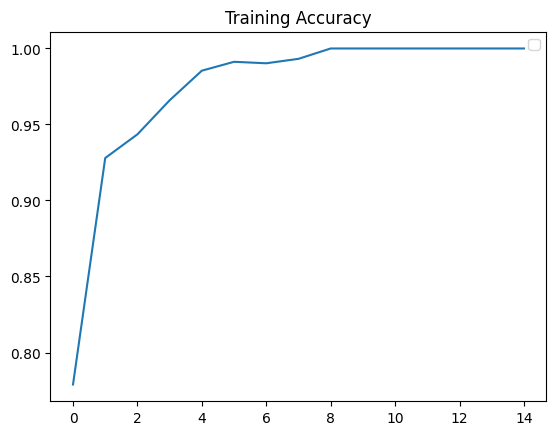

In [61]:
# plotting accuracy vs epochs graph

acc =history.history['accuracy']
epochs =range( len(acc))

plt.plot(epochs, acc)
plt.title("Training Accuracy")
plt.legend(loc=0)
plt.show()

##### Model prediction

In [62]:
# Create the widget and take care of the display
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(300, 300))
    image = tf.keras.utils.img_to_array(image)
    image = rescale_layer(image)
    image = np.expand_dims(image, axis=0)
    
    prediction = model.predict(image, verbose=0)[0][0]
    
    with out:
        if prediction > 0.5:
            print(filename + " is a human")
        else:
            print(filename + " is a horse")


def on_upload_change(change):
    """ A function for geting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)
    
    items = change.new
    for item in items: # Loop if there is more than one file uploaded  
        file_jpgdata = BytesIO(item.content)
        file_predict(item.name, file_jpgdata, out)

# Run the interactive widget
# Note: it may take a bit after you select the image to upload and process before you see the output.
uploader.observe(on_upload_change, names='value')

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Output()